# MPB Demo for 18.369

Here, we demonstrate running [MPB](https://mpb.readthedocs.io/en/latest/) for the MIT course [18.369](http://math.mit.edu/~stevenj/18.369/).  MPB computes dispersion
relations (band structures) $\omega(\vec{k})$ for arbitrary periodic dielectric structures,
from photonic crystals to optical fibers and other dielectric waveguides.

This is an [IPython notebook](https://ipython.readthedocs.io/en/stable/), which provides a nice
browser-based [Jupyter](http://jupyter.org/) interface to the [Python language](https://www.python.org/).  The notebook allows us to combine code and results in one place.

Here, we are using the (relatively new) Python interface to MPB, which is installed when you install [Meep](https://meep.readthedocs.io/en/latest/) (our free/open-source time-domain Maxwell simulation package) along with MPB.   The recommended way to install this software is to use [the Anaconda Python packages](https://meep.readthedocs.io/en/latest/Installation/#conda-packages) for Linux or MacOS.  On Windows, you can install the [Linux package via WSL](https://meep.readthedocs.io/en/latest/Installation/#installation-on-windows).

In [1]:
# do inline plots with Python's matplotlib library
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# load the Meep and MPB modules in Python
import meep as mp
from meep import mpb

## 2d dielectric waveguide

Our first example computes the dispersion relation and eigenfunctions of a width $h=1$ waveguide of $\varepsilon=12$ in air.

In [3]:
# First, we will define some parameters describing our structure.  
# Defining them symbolically here makes it easier to change them.

eps_hi = 12  # the waveguide dielectric constant
eps_lo = 1  # the surrounding low-dielectric material
h = 1       # the thickness of the waveguide (arbitrary units)
Y = 10      # the size of the computational cell in the y direction

#### Define the structure and the computational cell:

In [4]:
# Here we define the size of the computational cell.  Since it is 2d,
# it has no-size in the z direction.  Because it is a waveguide in the
# x direction, then the eigenproblem at a given k has no-size in the
# x direction as well.
geometry_lattice = mp.Lattice(size=(0, Y))

# the default-material is what fills space where we haven't placed objects
default_material = mp.Medium(epsilon=eps_lo)

# a list of geometric objects to create structures in our computation:
# (in this case, we only have one object, a block to make the waveguide)
geometry = [mp.Block(center=(0,0), # center of computational cell
                     size=(mp.inf, h, mp.inf),
                     material=mp.Medium(epsilon=eps_hi))]

# MPB discretizes space with a given resolution.   Here, we set
# a resolution of 32 pixels per unit distance.  Thus, with Y=10
# our comptuational cell will be 320 pixels wide.  In general,
# you should make the resolution fine enough so that the pixels
# are much smaller than the wavelength of the light.
#   -- to get high accuracy results, in practice you 
#      double the resolution until your answer stops changing
#      to your desired tolerance
resolution = 32

#### Tell MPB what eigenmodes we want to compute:

In [5]:
# Generally, we want omega(k) for a range of k values.  MPB
# can automatically interpolate a set of k values between any
# given bounds.  Here, we will interpolate 10 k's between 0 and 2.
#
# in MPB, the k vectors are in the basis of the primitive 
# reciprocal lattice vectors.   Here, for a 1d cell with zero
# width in the x direction, the units of kx are just units of 2pi/a
# where a is our distance units.

kmin = 0
kmax = 2
k_interp = 10
k_points = mp.interpolate(k_interp, [mp.Vector3(kmin), mp.Vector3(kmax)])

In [6]:
# let's look at our k points:
k_points

[Vector3<0.0, 0.0, 0.0>,
 Vector3<0.18181818181818182, 0.0, 0.0>,
 Vector3<0.36363636363636365, 0.0, 0.0>,
 Vector3<0.5454545454545454, 0.0, 0.0>,
 Vector3<0.7272727272727273, 0.0, 0.0>,
 Vector3<0.9090909090909092, 0.0, 0.0>,
 Vector3<1.0909090909090908, 0.0, 0.0>,
 Vector3<1.2727272727272727, 0.0, 0.0>,
 Vector3<1.4545454545454546, 0.0, 0.0>,
 Vector3<1.6363636363636365, 0.0, 0.0>,
 Vector3<1.8181818181818183, 0.0, 0.0>,
 Vector3<2.0, 0.0, 0.0>]

In [7]:
# we also need to specify how many eigenmodes we want to compute:
num_bands = 10

### Putting it all together

The quantities above are passed to MPB by creating a `ModeSolver` object.

(We could have done this directly without assigning them to variables first.)

In [8]:
ms = mpb.ModeSolver(num_bands=num_bands,
                    k_points=k_points,
                    geometry=geometry,
                    geometry_lattice=geometry_lattice,
                    resolution=resolution,
                    default_material=default_material)

#### Computing the modes

To compute *all* the modes, we could now simply do `ms.run()`.
However, it is convenient to compute only one symmetry of mode
at a time.  In particular, we will compute only TM (E in z direction)
modes, and separately compute even and odd modes with respect to the
y=0 mirror symmetry plane:

In [9]:
ms.run_tm_yeven()

Initializing eigensolver data
Computing 10 bands with 1e-07 tolerance
Working in 2 dimensions.
Grid size is 1 x 320 x 1.
Solving for 10 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0, 10, 0)
     (0, 0, 1)
Cell volume = 10
Reciprocal lattice vectors (/ 2 pi):
     (1, -0, 0)
     (-0, 0.1, -0)
     (0, -0, 1)
Geometric objects:
     block, center = (0,0,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
Geometric object tree has depth 1 and 3 object nodes (vs. 1 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: tmyeven.
Initializing fields to random numbers...
12 k-points
  Vector3<0.0, 0.0, 0.0>
  Vector3<0.18181818181818182, 0.0, 0.0>
  Vector3<0.36363636363636365, 0.0, 0.0>
  Vector3<0.5454545454545454, 0.0, 0.0>
  Vector3<0.7272727272727273, 0.0, 0.0>
  Vector3<0.9090909090909092, 0.0, 0.0>
  Vector3<1.0909090909090908, 0.0, 0.0>
  Vector3<1.2727272727272727

The 5 bands vs k are available in the `ms.all_freqs` object:

In [10]:
tmyeven_freqs = ms.all_freqs
tmyeven_freqs

array([[0.        , 0.0666843 , 0.16440014, 0.25492855, 0.30955458,
        0.39358338, 0.49230213, 0.56764631, 0.62724974, 0.72216722],
       [0.08022325, 0.18973071, 0.24005361, 0.29068499, 0.34346721,
        0.42988459, 0.52039153, 0.5817769 , 0.64781151, 0.74264765],
       [0.13251679, 0.32117627, 0.36816283, 0.40104317, 0.45708607,
        0.52564861, 0.58123007, 0.63076742, 0.71258594, 0.80029841],
       [0.18286521, 0.35795054, 0.54810954, 0.56797436, 0.59410794,
        0.62064201, 0.67318429, 0.73987945, 0.81275043, 0.87150387],
       [0.23307107, 0.39429153, 0.62978987, 0.72940818, 0.74615979,
        0.77808226, 0.82224388, 0.87012676, 0.90229161, 0.95519089],
       [0.2834862 , 0.43233373, 0.6591858 , 0.90657501, 0.91145823,
        0.92581871, 0.95222722, 0.99000277, 1.03770424, 1.0932104 ],
       [0.33416617, 0.47212049, 0.68925155, 0.93770485, 1.09231058,
        1.10341843, 1.12505237, 1.15560103, 1.18703782, 1.21073471],
       [0.38509278, 0.51345589, 0.7209185

In [11]:
tmyeven_freqs[:,0] # omega(k) for band 1 (= column 0 in Python)

array([0.        , 0.08022325, 0.13251679, 0.18286521, 0.23307107,
       0.2834862 , 0.33416617, 0.38509278, 0.43623162, 0.48754851,
       0.53901377, 0.59060286])

Let's do the same thing for the odd-y modes:

In [12]:
ms.run_tm_yodd()
tmyodd_freqs = ms.all_freqs

Initializing eigensolver data
Computing 10 bands with 1e-07 tolerance
Working in 2 dimensions.
Grid size is 1 x 320 x 1.
Solving for 10 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0, 10, 0)
     (0, 0, 1)
Cell volume = 10
Reciprocal lattice vectors (/ 2 pi):
     (1, -0, 0)
     (-0, 0.1, -0)
     (0, -0, 1)
Geometric objects:
     block, center = (0,0,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
Geometric object tree has depth 1 and 3 object nodes (vs. 1 actual objects)
Initializing epsilon function...
Solving for band polarization: tmyodd.
Initializing fields to random numbers...
12 k-points
  Vector3<0.0, 0.0, 0.0>
  Vector3<0.18181818181818182, 0.0, 0.0>
  Vector3<0.36363636363636365, 0.0, 0.0>
  Vector3<0.5454545454545454, 0.0, 0.0>
  Vector3<0.7272727272727273, 0.0, 0.0>
  Vector3<0.9090909090909092, 0.0, 0.0>
  Vector3<1.0909090909090908, 0.0, 0.0>
  Vector3<1.2727272727272727, 0.0, 0.0>
  Vector3<

#### Plotting the results

To plot the results vs. $k_x$, let's first extract a list of the $k_x$ components from the `k_points`:

In [13]:
kx = [k.x for k in ms.k_points]
kx

[0.0,
 0.18181818181818182,
 0.36363636363636365,
 0.5454545454545454,
 0.7272727272727273,
 0.9090909090909092,
 1.0909090909090908,
 1.2727272727272727,
 1.4545454545454546,
 1.6363636363636365,
 1.8181818181818183,
 2.0]

(0, 2)

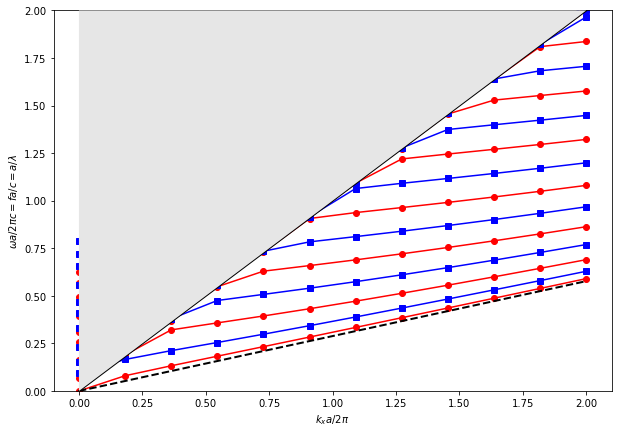

In [14]:
plt.figure(figsize=(10,7))
plt.plot(kx, tmyeven_freqs, "ro-")
plt.plot(kx, tmyodd_freqs, "bs-")
plt.plot(kx, kx, "k-", linewidth=2)
plt.plot(kx, kx / np.sqrt(eps_hi), "k--", linewidth=2)
plt.fill([0,2,0],[0,2,2], facecolor=(0.9,0.9,0.9), zorder=3)
plt.xlabel("$k_x a / 2\pi$")
plt.ylabel("$\omega a / 2\pi c = fa/c = a/\lambda$")
plt.ylim(0,2)

Next, we'll do the same thing for the modes that are odd with respect to $y=0$, plotting these as blue squares.

### Plotting the fields

MPB can also output the electric and magnetic fields of the eigensolutions.  

We can output the fields as files in [HDF5](https://en.wikipedia.org/wiki/Hierarchical_Data_Format) format, which ends in `.h5`.  A single HDF5 file can contain multiple "datasets", e.g. multiple field components or real+imaginary parts.

But in Python, we can also just load the fields etc. directly into Python (NumPy) arrays, and then plot them etc. interactively.

We almost always start by looking at $\varepsilon(x,y,z)$ to make sure the structure is correct:

In [15]:
eps = ms.get_epsilon()

epsilon: 1-12, mean 2.1, harm. mean 1.10386, 10.3125% > 1, 10% "fill"


(0, 13)

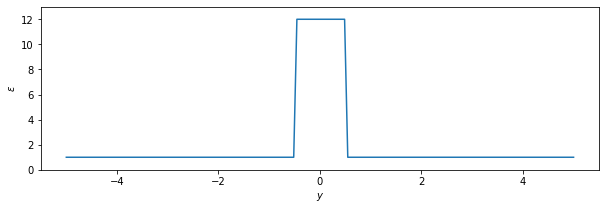

In [16]:
y = np.linspace(-Y/2,Y/2,eps.size)
plt.figure(figsize=(10,3))
plt.plot(y, eps)
plt.xlabel("$y$")
plt.ylabel("$\epsilon$")
plt.ylim(0,13)

As expected, $\varepsilon$ is 12 in the middle and 1 elsewhere.

Now let's run the mode solver at a single k point $k_x = 1$ and plot the fields.  We'll use `run_tm` to compute both y-even and y-odd modes together.

By default, MPB just picks a random phase for the eigenfunctions.  If we pass `mpb.fix_efield_phase` to the `run_tm` function, it picks a deterministic phase that tries to make the electric field as real as possible.

In [17]:
ms.k_points = [mp.Vector3(1)]
ms.run_tm(mpb.fix_efield_phase)

Initializing eigensolver data
Computing 10 bands with 1e-07 tolerance
Working in 2 dimensions.
Grid size is 1 x 320 x 1.
Solving for 10 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0, 10, 0)
     (0, 0, 1)
Cell volume = 10
Reciprocal lattice vectors (/ 2 pi):
     (1, -0, 0)
     (-0, 0.1, -0)
     (0, -0, 1)
Geometric objects:
     block, center = (0,0,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
Geometric object tree has depth 1 and 3 object nodes (vs. 1 actual objects)
Initializing epsilon function...
Solving for band polarization: tm.
Initializing fields to random numbers...
1 k-points
  Vector3<1.0, 0.0, 0.0>
elapsed time for initialization: 0.016029834747314453
solve_kpoint (1,0,0):
Solving for bands 1 to 10...
Finished solving for bands 1 to 10 after 29 iterations.
tmfreqs:, 1, 1, 0, 0, 1, 0.308793, 0.366015, 0.45202, 0.557191, 0.67404, 0.797606, 0.924094, 1.00156, 1.00591, 1.01393
elapsed time for 

In [18]:
ms.get_efield(1) # gets E field for band 1 at the last k point (kx=1)

MPBArray([[[[-0.00000000e+00+0.00000000e+00j,
             -0.00000000e+00+0.00000000e+00j,
             -3.12155064e-05+2.27342205e-05j]]],


          [[[ 0.00000000e+00-0.00000000e+00j,
              0.00000000e+00-0.00000000e+00j,
             -1.04017078e-04-1.51283383e-05j]]],


          [[[ 0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              4.89128287e-05+9.58965083e-05j]]],


          [[[ 0.00000000e+00-0.00000000e+00j,
              0.00000000e+00-0.00000000e+00j,
             -9.48578346e-05-7.64531387e-06j]]],


          [[[ 0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              3.38447893e-06-5.69883111e-05j]]],


          [[[ 0.00000000e+00-0.00000000e+00j,
              0.00000000e+00-0.00000000e+00j,
             -4.37801163e-05-4.54180226e-05j]]],


          [[[ 0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
              2.76138159e-05+3.83339978e-05j]]],



In [19]:
ms.get_efield(1).shape  # 4d array (y,x,z,3 components)

(320, 1, 1, 3)

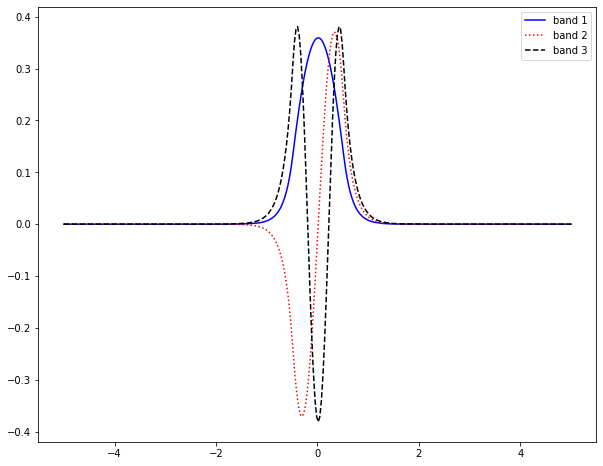

In [20]:
plt.figure(figsize=(10,8))
ez1 = ms.get_efield(1)[:,0,0,2] # the z component of band 1
ez2 = ms.get_efield(2)[:,0,0,2] # the z component of band 2
ez3 = ms.get_efield(3)[:,0,0,2] # the z component of band 3
# ez4 = ms.get_efield(4)[:,0,0,2] # the z component of band 3
plt.plot(y, np.real(ez1), "b-")
plt.plot(y, np.real(ez2), "r:")
plt.plot(y, np.real(ez3), "k--")
# plt.plot(y, np.real(ez4), "g-")
plt.legend(["band 1", "band 2", "band 3"])

Let's check that they have the expected orthogonality relationship, i.e. $\int \vec{E}_3^* \cdot \varepsilon \vec{E}_1 \approx 0$:

In [21]:
np.dot(ez3, (eps * ez1)) / (np.linalg.norm(ez1) * np.linalg.norm(ez3))

(-1.1918075249179233e-07-6.404101326359512e-08j)

Yup, the overlap integral is almost zero.

(It's slightly nonzero due to discretization effects — computing the sum with numpy is not the same as the planewave-basis inner product used within MPB.)

## 2d periodic waveguide

Here, we consider a period-$a$ sequence of dielectric ($\varepsilon=12$) rods of radius $0.2a$ in air.

This time, we won't bother to define a bunch of variables first — we will just create a `ModeSolver` object right away.  We'll use the same `eps_hi`, `eps_lo`, and `Y` (supercell size) variables as before.

Note that the `geometry_lattice` variable now has `size=(1,Y)`: we have a period $a=1$ in the $x$ direction:

In [22]:
ms2 = mpb.ModeSolver(
    num_bands=5,
    k_points=mp.interpolate(200, [mp.Vector3(0),mp.Vector3(2)]),
    geometry=[mp.Cylinder(center=(0,0), radius=0.2, material=mp.Medium(epsilon=eps_hi))],
    geometry_lattice=mp.Lattice(size=(1, Y)),
    resolution=16,
    default_material=mp.Medium(epsilon=eps_lo))

ms2.run_tm_yeven()  # Ez polarization, even with respect to y=0
tmyeven_freqs2 = ms2.all_freqs
ms2.run_tm_yodd()   # Ez polarization, odd with respect to y=0
tmyodd_freqs2 = ms2.all_freqs
kx2 = [k.x for k in ms2.k_points]

Initializing eigensolver data
Computing 5 bands with 1e-07 tolerance
Working in 2 dimensions.
Grid size is 16 x 160 x 1.
Solving for 5 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0, 10, 0)
     (0, 0, 1)
Cell volume = 10
Reciprocal lattice vectors (/ 2 pi):
     (1, -0, 0)
     (-0, 0.1, -0)
     (0, -0, 1)
Geometric objects:
     cylinder, center = (0,0,0)
          radius 0.2, height 1e+20, axis (0, 0, 1)
Geometric object tree has depth 1 and 1 object nodes (vs. 1 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: tmyeven.
Initializing fields to random numbers...
202 k-points
  Vector3<0.0, 0.0, 0.0>
  Vector3<0.009950248756218905, 0.0, 0.0>
  Vector3<0.01990049751243781, 0.0, 0.0>
  Vector3<0.029850746268656716, 0.0, 0.0>
  Vector3<0.03980099502487562, 0.0, 0.0>
  Vector3<0.04975124378109452, 0.0, 0.0>
  Vector3<0.05970149253731343, 0.0, 0.0>
  Vector3<0.06965174129353234, 0.0, 0.0>

Solving for bands 2 to 5...
Finished solving for bands 2 to 5 after 9 iterations.
tmyevenfreqs:, 1, 0, 0, 0, 0, 0, 0.0883666, 0.179071, 0.272298, 0.366919
elapsed time for k point: 0.05570816993713379
solve_kpoint (0.00995025,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 4 iterations.
tmyevenfreqs:, 2, 0.00995025, 0, 0, 0.00995025, 0.00932425, 0.0888054, 0.179302, 0.272458, 0.367039
elapsed time for k point: 0.03566908836364746
solve_kpoint (0.0199005,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 4 iterations.
tmyevenfreqs:, 3, 0.0199005, 0, 0, 0.0199005, 0.0186349, 0.0901097, 0.179996, 0.272937, 0.367399
elapsed time for k point: 0.036803245544433594
solve_kpoint (0.0298507,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 4 iterations.
tmyevenfreqs:, 4, 0.0298507, 0, 0, 0.0298507, 0.0279176, 0.0922456, 0.181148, 0.273734, 0.367999
elapsed time for k point: 0.029099702835083008
solve_kpoint (0.039801,0,0):

tmyevenfreqs:, 33, 0.318408, 0, 0, 0.318408, 0.221292, 0.322784, 0.354694, 0.407212, 0.462213
elapsed time for k point: 0.03796720504760742
solve_kpoint (0.328358,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 6 iterations.
tmyevenfreqs:, 34, 0.328358, 0, 0, 0.328358, 0.22517, 0.332551, 0.363296, 0.413976, 0.464717
elapsed time for k point: 0.039180755615234375
solve_kpoint (0.338308,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 6 iterations.
tmyevenfreqs:, 35, 0.338308, 0, 0, 0.338308, 0.228876, 0.342329, 0.37194, 0.420624, 0.466814
elapsed time for k point: 0.04059410095214844
solve_kpoint (0.348259,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 6 iterations.
tmyevenfreqs:, 36, 0.348259, 0, 0, 0.348259, 0.232406, 0.352115, 0.38061, 0.42705, 0.4687
elapsed time for k point: 0.040479183197021484
solve_kpoint (0.358209,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 6 iterations.


Finished solving for bands 1 to 5 after 6 iterations.
tmyevenfreqs:, 66, 0.646766, 0, 0, 0.646766, 0.234103, 0.357011, 0.384947, 0.430136, 0.469649
elapsed time for k point: 0.041681766510009766
solve_kpoint (0.656716,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 6 iterations.
tmyevenfreqs:, 67, 0.656716, 0, 0, 0.656716, 0.230664, 0.347221, 0.376273, 0.423873, 0.467768
elapsed time for k point: 0.0413670539855957
solve_kpoint (0.666667,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 6 iterations.
tmyevenfreqs:, 68, 0.666667, 0, 0, 0.666667, 0.227045, 0.337438, 0.367613, 0.41732, 0.465807
elapsed time for k point: 0.04000091552734375
solve_kpoint (0.676617,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 6 iterations.
tmyevenfreqs:, 69, 0.676617, 0, 0, 0.676617, 0.223253, 0.327666, 0.358989, 0.410603, 0.463525
elapsed time for k point: 0.03876900672912598
solve_kpoint (0.686567,0,0):
Solving for bands 1 to 5.

Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 4 iterations.
tmyevenfreqs:, 99, 0.975124, 0, 0, 0.975124, 0.0232807, 0.0910765, 0.180515, 0.273296, 0.367669
elapsed time for k point: 0.028898954391479492
solve_kpoint (0.985075,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 4 iterations.
tmyevenfreqs:, 100, 0.985075, 0, 0, 0.985075, 0.0139821, 0.089351, 0.179592, 0.272658, 0.367189
elapsed time for k point: 0.029259920120239258
solve_kpoint (0.995025,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 4 iterations.
tmyevenfreqs:, 101, 0.995025, 0, 0, 0.995025, 0.00466297, 0.0884765, 0.179129, 0.272338, 0.366949
elapsed time for k point: 0.029524803161621094
solve_kpoint (1.00498,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 4 iterations.
tmyevenfreqs:, 102, 1.00498, 0, 0, 1.00498, 0.00466297, 0.0884765, 0.179129, 0.272338, 0.366949
elapsed time for k point: 0.030379056930541992
solve_kpoint

Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 6 iterations.
tmyevenfreqs:, 132, 1.30348, 0, 0, 1.30348, 0.21516, 0.30816, 0.3419, 0.397003, 0.457522
elapsed time for k point: 0.03849196434020996
solve_kpoint (1.31343,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 6 iterations.
tmyevenfreqs:, 133, 1.31343, 0, 0, 1.31343, 0.21929, 0.317906, 0.350413, 0.403811, 0.460778
elapsed time for k point: 0.03956294059753418
solve_kpoint (1.32338,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 6 iterations.
tmyevenfreqs:, 134, 1.32338, 0, 0, 1.32338, 0.223253, 0.327666, 0.358989, 0.410604, 0.463527
elapsed time for k point: 0.0382540225982666
solve_kpoint (1.33333,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 6 iterations.
tmyevenfreqs:, 135, 1.33333, 0, 0, 1.33333, 0.227045, 0.337438, 0.367613, 0.41732, 0.46581
elapsed time for k point: 0.03892803192138672
solve_kpoint (1.34328,0,0):
Solving for 

Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 6 iterations.
tmyevenfreqs:, 165, 1.63184, 0, 0, 1.63184, 0.238918, 0.371706, 0.397925, 0.438592, 0.473019
elapsed time for k point: 0.03840494155883789
solve_kpoint (1.64179,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 6 iterations.
tmyevenfreqs:, 166, 1.64179, 0, 0, 1.64179, 0.235755, 0.361909, 0.389282, 0.433106, 0.470659
elapsed time for k point: 0.03709292411804199
solve_kpoint (1.65174,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 6 iterations.
tmyevenfreqs:, 167, 1.65174, 0, 0, 1.65174, 0.232407, 0.352115, 0.38061, 0.427051, 0.468705
elapsed time for k point: 0.03677701950073242
solve_kpoint (1.66169,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 6 iterations.
tmyevenfreqs:, 168, 1.66169, 0, 0, 1.66169, 0.228877, 0.342329, 0.37194, 0.420624, 0.466819
elapsed time for k point: 0.038233280181884766
solve_kpoint (1.67164,0,0):
Solvi

Finished solving for bands 1 to 5 after 4 iterations.
tmyevenfreqs:, 198, 1.9602, 0, 0, 1.9602, 0.037157, 0.0951621, 0.182752, 0.274847, 0.368836
elapsed time for k point: 0.02797698974609375
solve_kpoint (1.97015,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 4 iterations.
tmyevenfreqs:, 199, 1.97015, 0, 0, 1.97015, 0.0279176, 0.0922456, 0.181148, 0.273734, 0.367999
elapsed time for k point: 0.028656959533691406
solve_kpoint (1.9801,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 4 iterations.
tmyevenfreqs:, 200, 1.9801, 0, 0, 1.9801, 0.0186349, 0.0901097, 0.179996, 0.272937, 0.367399
elapsed time for k point: 0.02991199493408203
solve_kpoint (1.99005,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 4 iterations.
tmyevenfreqs:, 201, 1.99005, 0, 0, 1.99005, 0.00932425, 0.0888054, 0.179302, 0.272458, 0.367039
elapsed time for k point: 0.029532909393310547
solve_kpoint (2,0,0):
Solving for bands 1 to 5...
Finis

  Vector3<1.8308457711442785, 0.0, 0.0>
  Vector3<1.8407960199004976, 0.0, 0.0>
  Vector3<1.8507462686567164, 0.0, 0.0>
  Vector3<1.8606965174129353, 0.0, 0.0>
  Vector3<1.8706467661691542, 0.0, 0.0>
  Vector3<1.880597014925373, 0.0, 0.0>
  Vector3<1.890547263681592, 0.0, 0.0>
  Vector3<1.900497512437811, 0.0, 0.0>
  Vector3<1.9104477611940298, 0.0, 0.0>
  Vector3<1.9203980099502487, 0.0, 0.0>
  Vector3<1.9303482587064675, 0.0, 0.0>
  Vector3<1.9402985074626866, 0.0, 0.0>
  Vector3<1.9502487562189055, 0.0, 0.0>
  Vector3<1.9601990049751243, 0.0, 0.0>
  Vector3<1.9701492537313432, 0.0, 0.0>
  Vector3<1.980099502487562, 0.0, 0.0>
  Vector3<1.9900497512437811, 0.0, 0.0>
  Vector3<2.0, 0.0, 0.0>
elapsed time for initialization: 0.022723913192749023
solve_kpoint (0,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 10 iterations.
tmyoddfreqs:, 1, 0, 0, 0, 0, 0.0999415, 0.19949, 0.297978, 0.39371, 0.481438
elapsed time for k point: 0.07180118560791016
solve_kpoint (0.0

tmyoddfreqs:, 30, 0.288557, 0, 0, 0.288557, 0.305149, 0.349813, 0.411876, 0.479169, 0.538597
elapsed time for k point: 0.03214287757873535
solve_kpoint (0.298507,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 5 iterations.
tmyoddfreqs:, 31, 0.298507, 0, 0, 0.298507, 0.314552, 0.357962, 0.418571, 0.484086, 0.541846
elapsed time for k point: 0.03355598449707031
solve_kpoint (0.308458,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 5 iterations.
tmyoddfreqs:, 32, 0.308458, 0, 0, 0.308458, 0.323987, 0.36619, 0.425349, 0.489001, 0.545158
elapsed time for k point: 0.0336918830871582
solve_kpoint (0.318408,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 5 iterations.
tmyoddfreqs:, 33, 0.318408, 0, 0, 0.318408, 0.333449, 0.374489, 0.4322, 0.493889, 0.548548
elapsed time for k point: 0.03354501724243164
solve_kpoint (0.328358,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 5 iterations.
tmyo

tmyoddfreqs:, 63, 0.616915, 0, 0, 0.616915, 0.395459, 0.429684, 0.477229, 0.523485, 0.573885
elapsed time for k point: 0.03597116470336914
solve_kpoint (0.626866,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 6 iterations.
tmyoddfreqs:, 64, 0.626866, 0, 0, 0.626866, 0.385875, 0.421098, 0.470399, 0.519262, 0.569501
elapsed time for k point: 0.037262916564941406
solve_kpoint (0.636816,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 6 iterations.
tmyoddfreqs:, 65, 0.636816, 0, 0, 0.636816, 0.376304, 0.412533, 0.463482, 0.514916, 0.565313
elapsed time for k point: 0.03773307800292969
solve_kpoint (0.646766,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 6 iterations.
tmyoddfreqs:, 66, 0.646766, 0, 0, 0.646766, 0.366747, 0.403999, 0.45652, 0.510438, 0.561315
elapsed time for k point: 0.03636789321899414
solve_kpoint (0.656716,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 6 iterations.


tmyoddfreqs:, 96, 0.945274, 0, 0, 0.945274, 0.113928, 0.206818, 0.30287, 0.397272, 0.483928
elapsed time for k point: 0.02927994728088379
solve_kpoint (0.955224,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 4 iterations.
tmyoddfreqs:, 97, 0.955224, 0, 0, 0.955224, 0.109502, 0.204425, 0.301262, 0.396099, 0.483109
elapsed time for k point: 0.02984905242919922
solve_kpoint (0.965174,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 4 iterations.
tmyoddfreqs:, 98, 0.965174, 0, 0, 0.965174, 0.105828, 0.20249, 0.299969, 0.395157, 0.482451
elapsed time for k point: 0.028578996658325195
solve_kpoint (0.975124,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 4 iterations.
tmyoddfreqs:, 99, 0.975124, 0, 0, 0.975124, 0.102987, 0.201026, 0.298996, 0.394449, 0.481955
elapsed time for k point: 0.03036808967590332
solve_kpoint (0.985075,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 3 iterations.
t

tmyoddfreqs:, 129, 1.27363, 0, 0, 1.27363, 0.291107, 0.33775, 0.402015, 0.471837, 0.533825
elapsed time for k point: 0.0344541072845459
solve_kpoint (1.28358,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 5 iterations.
tmyoddfreqs:, 130, 1.28358, 0, 0, 1.28358, 0.300459, 0.345769, 0.408563, 0.476717, 0.536994
elapsed time for k point: 0.03425002098083496
solve_kpoint (1.29353,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 5 iterations.
tmyoddfreqs:, 131, 1.29353, 0, 0, 1.29353, 0.309846, 0.353877, 0.415212, 0.481627, 0.540214
elapsed time for k point: 0.03424715995788574
solve_kpoint (1.30348,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 5 iterations.
tmyoddfreqs:, 132, 1.30348, 0, 0, 1.30348, 0.319266, 0.362067, 0.42195, 0.486545, 0.543493
elapsed time for k point: 0.03399085998535156
solve_kpoint (1.31343,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 5 iterations.
tmyoddfreqs

tmyoddfreqs:, 162, 1.60199, 0, 0, 1.60199, 0.409853, 0.442574, 0.487188, 0.529657, 0.580772
elapsed time for k point: 0.04088711738586426
solve_kpoint (1.61194,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 7 iterations.
tmyoddfreqs:, 163, 1.61194, 0, 0, 1.61194, 0.400255, 0.433981, 0.480595, 0.525558, 0.576146
elapsed time for k point: 0.03974413871765137
solve_kpoint (1.62189,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 6 iterations.
tmyoddfreqs:, 164, 1.62189, 0, 0, 1.62189, 0.390666, 0.425389, 0.473828, 0.521388, 0.571669
elapsed time for k point: 0.03878188133239746
solve_kpoint (1.63184,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 6 iterations.
tmyoddfreqs:, 165, 1.63184, 0, 0, 1.63184, 0.381088, 0.416812, 0.466949, 0.517106, 0.567382
elapsed time for k point: 0.03771519660949707
solve_kpoint (1.64179,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 6 iterations.
tmyoddfr

tmyoddfreqs:, 195, 1.93035, 0, 0, 1.93035, 0.121794, 0.211232, 0.305861, 0.399461, 0.485455
elapsed time for k point: 0.02919483184814453
solve_kpoint (1.9403,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 4 iterations.
tmyoddfreqs:, 196, 1.9403, 0, 0, 1.9403, 0.116397, 0.208182, 0.30379, 0.397945, 0.484398
elapsed time for k point: 0.030105113983154297
solve_kpoint (1.95025,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 4 iterations.
tmyoddfreqs:, 197, 1.95025, 0, 0, 1.95025, 0.111626, 0.205565, 0.302027, 0.396657, 0.483499
elapsed time for k point: 0.0306398868560791
solve_kpoint (1.9602,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 4 iterations.
tmyoddfreqs:, 198, 1.9602, 0, 0, 1.9602, 0.107566, 0.203399, 0.300576, 0.395599, 0.48276
elapsed time for k point: 0.028671979904174805
solve_kpoint (1.97015,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 4 iterations.
tmyoddfreqs:, 1

It's always a good idea to read in $\varepsilon$ and plot it as a check, using the `imshow` function to plot a colormap:

In [23]:
ms2.get_epsilon().shape  # (x size, y size) = (resolution, Y*resolution)

epsilon: 1-12, mean 1.13823, harm. mean 1.01472, 1.75781% > 1, 1.25664% "fill"


(16, 160)

epsilon: 1-12, mean 1.13823, harm. mean 1.01472, 1.75781% > 1, 1.25664% "fill"


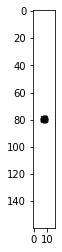

In [24]:
plt.imshow(ms2.get_epsilon().T, cmap='binary')

This looks right!  It is often nice to plot multiple periods of the unit cell, and MPB provides a type called `MPBData` that can perform such post-processing.  Let's plot 21 periods in the `x` direction and upsample to a higher `resolution`).

epsilon: 1-12, mean 1.13823, harm. mean 1.01472, 1.75781% > 1, 1.25664% "fill"


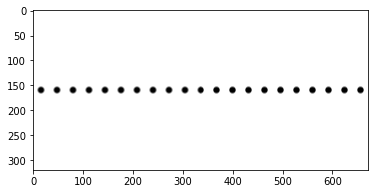

In [25]:
md = mpb.MPBData(x=21, resolution=32)
plt.imshow(md.convert(ms2.get_epsilon()).T, cmap='binary')

Now that $\varepsilon$ looks good, let's plot the band diagrams.  Normally, we would only compute the band diagram in the first Brillouin zone, or its subset the irreducible Brillouin zone, but for illustration purposes here we compute a couple of unit cells in $k$ to show the periodicity of the band diagram.  As before, we'll use `fill_between` to plot the light cone (which is also periodic) on top.

Text(0.5, 0, '$k_x$ in units of $2\\pi/a$')

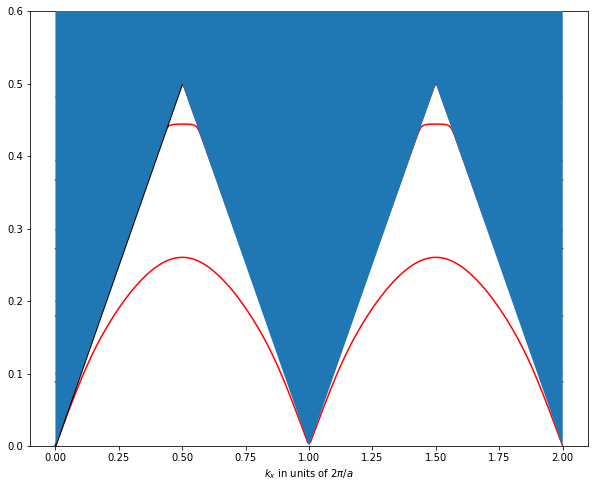

In [26]:
plt.figure(figsize=(10,8))
plt.plot(kx2, tmyeven_freqs2, "r-")
plt.plot(kx2, tmyodd_freqs2, "b--")
plt.plot(kx2, kx2, "k-", linewidth=2)
plt.fill_between([0,0.5,1,1.5,2.0],[0,0.5,0,0.5,0],[1,1,1,1,1], zorder=3)
plt.ylim(0,0.6)
plt.xlabel("$k_x$ in units of $2\pi/a$")

In this case, there are only even-symmetry TM guided bands, and for much of the Brillouin zone there is only a single guided band.  (You will show in homework that at least one guided band is guaranteed analytically in structures such as this.)

Now let's plot the field computed at $k=0.4 \times 2\pi/a$:

In [27]:
ms2.k_points = [mp.Vector3(0.4)]
ms2.run_tm_yeven(mpb.fix_efield_phase)

Initializing eigensolver data
Computing 5 bands with 1e-07 tolerance
Working in 2 dimensions.
Grid size is 16 x 160 x 1.
Solving for 5 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0, 10, 0)
     (0, 0, 1)
Cell volume = 10
Reciprocal lattice vectors (/ 2 pi):
     (1, -0, 0)
     (-0, 0.1, -0)
     (0, -0, 1)
Geometric objects:
     cylinder, center = (0,0,0)
          radius 0.2, height 1e+20, axis (0, 0, 1)
Geometric object tree has depth 1 and 1 object nodes (vs. 1 actual objects)
Initializing epsilon function...
Solving for band polarization: tmyeven.
Initializing fields to random numbers...
1 k-points
  Vector3<0.4, 0.0, 0.0>
elapsed time for initialization: 0.014282703399658203
solve_kpoint (0.4,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 11 iterations.
tmyevenfreqs:, 1, 0.4, 0, 0, 0.4, 0.247719, 0.403026, 0.424431, 0.451077, 0.486499
elapsed time for k point: 0.07695508003234863
Fixing e-field (band 

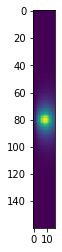

In [28]:
ez1 = ms2.get_efield(1)[:,:,0,2] # Ez(x,y) of 1st band
plt.imshow(np.imag(ez1).T, cmap="viridis")

Unfortunately, it's a little hard to make sense of the field if you only look at a single unit cell.  It is a lot clearer if you plot multiple unit cells, multiplying the field by $\exp(i k a)$ as you go from one unit cell to the next.

We'll use our `md = MPBData(...)` object from above to plot multiple periods in the $x$ direction.   The `MPBData` object also "knows" to multiply by the Bloch phase factor $\exp(ika)$ for each successive unit cell.

We'll also be a little more careful to center the colormap on zero, using `np.max(abs(ez))` to compute the maximum absolute value of the data and then the `vmin/vmax` options to `imshow` to set the edges of the colormap.  That way, with the `RdBu` colormap, red=negative, blue=positive, and white is zero.

Text(0.5, 1.0, '$E_z$ of band 1 at $k_x = 0.4 \\times 2\\pi/a$')

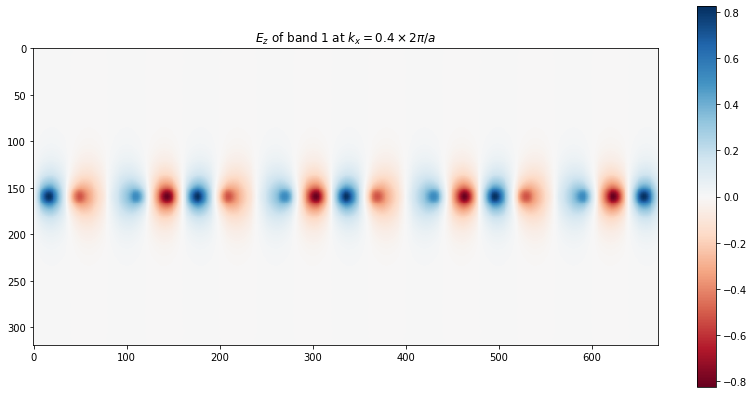

In [29]:
ez = np.imag(md.convert(ms2.get_efield(1)[:,:,0,2]))
maxabs = np.max(abs(ez))
plt.figure(figsize=(14,7))
plt.imshow(ez.T, cmap='RdBu', vmin=-maxabs, vmax=+maxabs)
plt.colorbar()
plt.title("$E_z$ of band 1 at $k_x = 0.4 \\times 2\pi/a$")

Now we can see more easily that the fields are oscillating within the waveguide and are exponentially decaying outside the waveguide: a guided mode!

Notice that this should repeat every N periods where $Nka$ is an integer multiple of $2\pi$.   In this k = $0.4 2\pi/a$.   The smallest $N$ where $0.4N$ is an integer is $N=5$.  Above, it repeats every $N$ periods.

(This kind of guided mode, in periodic dielectric waveguides, is discussed in more detail by [chapter 7 of the textbook](http://ab-initio.mit.edu/book/photonic-crystals-book.pdf).)

It's also instructive to plot a mode above the light line, e.g. the 3rd band.  Such a mode is **not localized** and hence is strongly affected by the *artificial periodic boundary conditions* in the $y$ direction; basically you should think of it as an **artifact of the finite computational cell**:

Text(0.5, 1.0, 'non-guided mode (above light line) at $k_x = 0.4 \\times 2\\pi/a$')

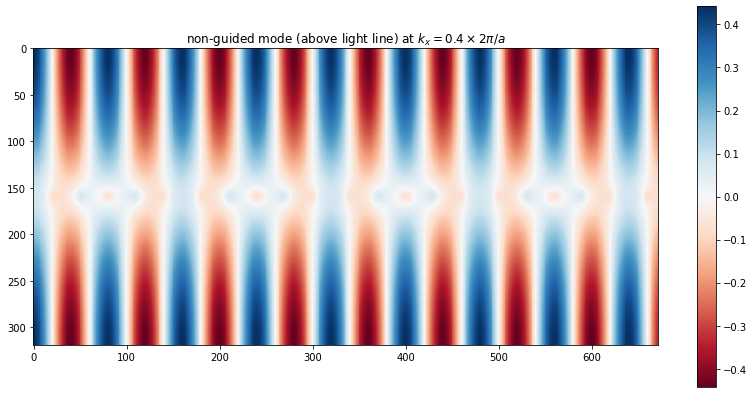

In [30]:
ez = np.real(md.convert(ms2.get_efield(2)[:,:,0,2]))
maxabs = np.max(abs(ez))
plt.figure(figsize=(14,7))
plt.imshow(ez.T, cmap='RdBu', vmin=-maxabs, vmax=+maxabs)
plt.colorbar()
plt.title("non-guided mode (above light line) at $k_x = 0.4 \\times 2\pi/a$")

### Two guided modes at edge of the Brillouin zone

It is also interesting to look at the two guided modes at the edge of the Brillouin zone $k_x = \pi / a = 0.5 * 2\pi/a$ ($k_x=0.5$ in MPB units).

The edge of the Brillouin zone is special in a couple of ways.  The slope $d\omega/dk$ of the bands is zero there, and we will see later that this means they are **standing-wave modes** (zero group velocity).   Also, at $k_x = \pi/a$ the "little group of k" includes the $x=0$ mirror symmetry plane (since $\pm \pi/a$ are equivalent), so we expect modes to be **even or odd with respect to x=0**.

Let's compute and plot them:

In [31]:
ms2.k_points = [mp.Vector3(0.5)]
ms2.run_tm_yeven(mpb.fix_efield_phase)

Initializing eigensolver data
Computing 5 bands with 1e-07 tolerance
Working in 2 dimensions.
Grid size is 16 x 160 x 1.
Solving for 5 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0, 10, 0)
     (0, 0, 1)
Cell volume = 10
Reciprocal lattice vectors (/ 2 pi):
     (1, -0, 0)
     (-0, 0.1, -0)
     (0, -0, 1)
Geometric objects:
     cylinder, center = (0,0,0)
          radius 0.2, height 1e+20, axis (0, 0, 1)
Geometric object tree has depth 1 and 1 object nodes (vs. 1 actual objects)
Initializing epsilon function...
Solving for band polarization: tmyeven.
Initializing fields to random numbers...
1 k-points
  Vector3<0.5, 0.0, 0.0>
elapsed time for initialization: 0.0182650089263916
solve_kpoint (0.5,0,0):
Solving for bands 1 to 5...
Finished solving for bands 1 to 5 after 82 iterations.
tmyevenfreqs:, 1, 0.5, 0, 0, 0.5, 0.260293, 0.444179, 0.502659, 0.50304, 0.523355
elapsed time for k point: 0.3751790523529053
Fixing e-field (band 1) p

To help us see what is going on, we'll plot $\varepsilon$ as a contour plot superimposed on the $E_z$ field pattern, and we'll use the `subplot` function to make two plots next to one another:

epsilon: 1-12, mean 1.13823, harm. mean 1.01472, 1.75781% > 1, 1.25664% "fill"


Text(0.5, 1.0, '$E_z$ of second band at $k_x = \\pi / a = 0.5 2\\pi/a$')

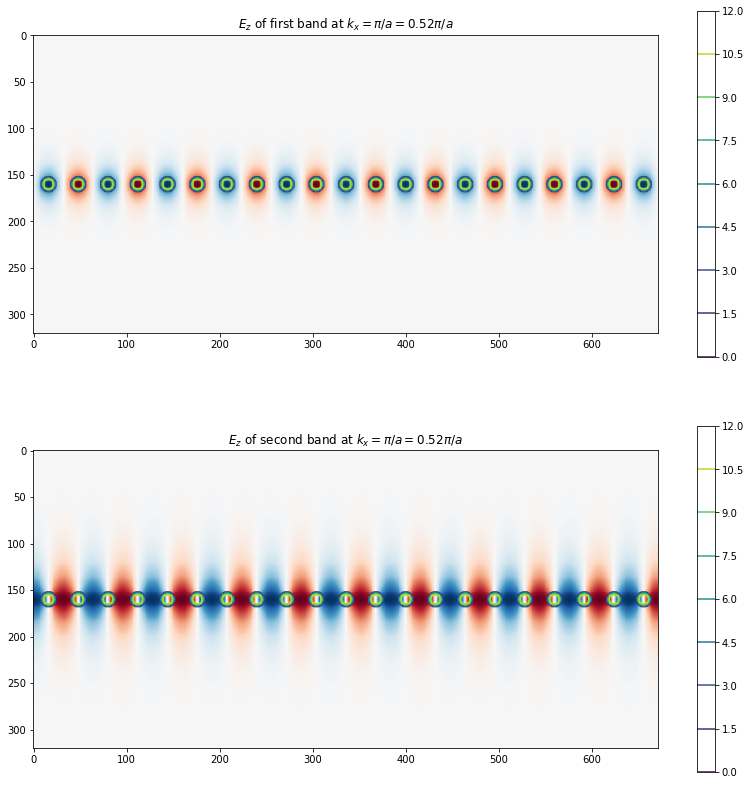

In [32]:
ez = np.imag(md.convert(ms2.get_efield(1)[:,:,0,2]))

plt.figure(figsize=(14,14))

plt.subplot(2,1,1)
eps = md.convert(ms2.get_epsilon())
maxabs = np.max(abs(ez))
plt.imshow(ez.T, cmap='RdBu', vmin=-maxabs, vmax=+maxabs)
plt.contour(eps.T)
plt.colorbar()
plt.title("$E_z$ of first band at $k_x = \pi / a = 0.5 2\pi/a$")


plt.subplot(2,1,2)
ez = np.real(md.convert(ms2.get_efield(2)[:,:,0,2]))
maxabs = np.max(abs(ez))
plt.imshow(ez.T, cmap='RdBu', vmin=-maxabs, vmax=+maxabs)
plt.contour(eps.T)
plt.colorbar()
plt.title("$E_z$ of second band at $k_x = \pi / a = 0.5 2\pi/a$")

The first band has its $E_z$ field **peaked in the rods** and is therefore **even** with respect to $x=0$.

The second band must be **orthogonal** to the first, so it must have a **sign oscillation**: its $E_z$ field **peaked between the rods** and is therefore **odd** with respect to $x=0$.

You can understand this analytically in a couple of different ways:

* From perturbation theory, if we start with a uniform waveguide and gradually turn on a periodic modulation (e.g. "pinch off" the rods), you will see (**just as we did for 1d gaps**) that the perturbation splits the solution at the edge of the Brillouin zone into a lower-frequency even solution (peaked in the rods) and a higher-frequency odd solution.

* From the min–max (variational) theorem, the lowest band "wants" to concentrate in the high ε while oscillating as little as possible (to minimize the Rayleigh quotient).  The next band "wants" to do the same thing, but must also be orthogonal to the first band and so it must have a sign oscillation in the rods.